# Linear activation in the hidden layers — NNFS Chapter 3

Here we look at what happens when **hidden layers use a linear activation**.

For a single neuron we have:

- Pre-activation: $z = \text{weights} \cdot \text{inputs} + b$
- Linear activation: $y = x$, so the activation just returns $z$

No matter how we tweak the **weights** and **bias**, the neuron's output is always a point on the
same line:

$$y = x$$

The activation function itself is fixed and linear; the parameters just move us **along that line**.

In this notebook we'll:

1. Define a tiny linear neuron with activation $y = x$.
2. Try different weights and biases and plot the resulting outputs as points on the line $y = x$.
3. Show with a small example that stacking linear layers is equivalent to **one linear layer**.


In [22]:
import numpy as np
import matplotlib.pyplot as plt

def setup_axes(title=None):
    """Draw light axes like the book diagrams."""
    plt.axhline(0, color="tab:blue", alpha=0.3, linewidth=1)
    plt.axvline(0, color="tab:blue", alpha=0.3, linewidth=1)
    if title is not None:
        plt.title(title)
    plt.xlabel("x (input to activation)")
    plt.ylabel("y (output of activation)")
    plt.grid(True)

def neuron_output(weights, bias, inputs):
    """Single neuron with linear activation y = x.

    weights: 1D array of shape (n_features,)
    bias: scalar
    inputs: 1D array of shape (n_features,)
    """
    z = np.dot(weights, inputs) + bias  # pre-activation
    y = z                               # linear activation y = x
    return z, y

In [23]:
# Example inputs (similar spirit to the book diagrams)
inputs = np.array([1.0, 2.0, -3.0])
print("inputs:", inputs)

inputs: [ 1.  2. -3.]


Case 1 -> z = 1.00, y = 1.00


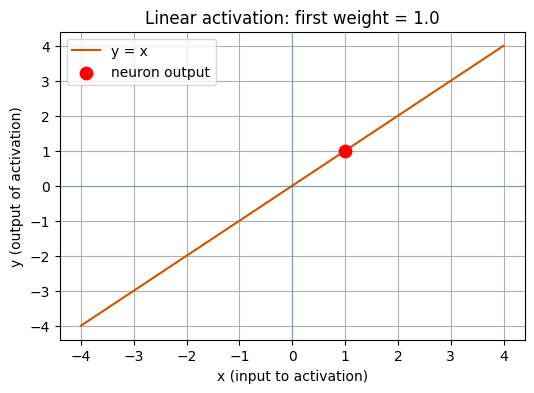

In [24]:
# Case 1: first weight is 1.0, others and bias are 0.0

weights_1 = np.array([1.0, 0.0, 0.0])
bias_1 = 0.0

z1, y1 = neuron_output(weights_1, bias_1, inputs)
print(f"Case 1 -> z = {z1:.2f}, y = {y1:.2f}")  # will lie on y = x

# Plot the activation function y = x and this point
x_line = np.linspace(-4, 4, 200)
y_line = x_line

plt.figure(figsize=(6, 4))
plt.plot(x_line, y_line, c="#cc5500", label="y = x")  # orange line
plt.scatter([z1], [y1], color="red", s=80, zorder=3, label="neuron output")  # red dot
setup_axes("Linear activation: first weight = 1.0")
plt.legend()
plt.show()

Case 2 -> z = -1.00, y = -1.00


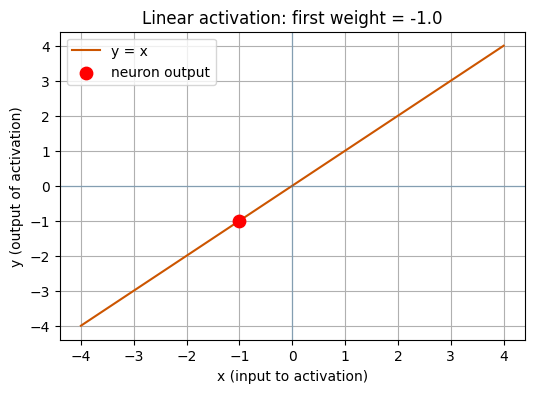

In [25]:
# Case 2: tweak the first weight to -1.0 (others and bias still 0.0)

weights_2 = np.array([-1.0, 0.0, 0.0])
bias_2 = 0.0

z2, y2 = neuron_output(weights_2, bias_2, inputs)
print(f"Case 2 -> z = {z2:.2f}, y = {y2:.2f}")  # still lies on y = x

plt.figure(figsize=(6, 4))
plt.plot(x_line, y_line, c="#cc5500", label="y = x")
plt.scatter([z2], [y2], color="red", s=80, zorder=3, label="neuron output")
setup_axes("Linear activation: first weight = -1.0")
plt.legend()
plt.show()

Case 3 -> z = 4.00, y = 4.00


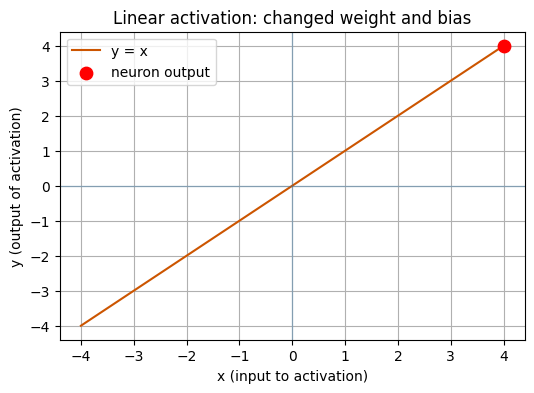

In [26]:
# Case 3: change another weight and add a bias

weights_3 = np.array([0.0, 1.0, 0.0])
bias_3 = 2.0

z3, y3 = neuron_output(weights_3, bias_3, inputs)
print(f"Case 3 -> z = {z3:.2f}, y = {y3:.2f}")  # still on y = x

plt.figure(figsize=(6, 4))
plt.plot(x_line, y_line, c="#cc5500", label="y = x")
plt.scatter([z3], [y3], color="red", s=80, zorder=3, label="neuron output")
setup_axes("Linear activation: changed weight and bias")
plt.legend()
plt.show()

In [27]:
# 4. Stacking linear layers is still linear

# First linear layer: y = W1 * x + b1
W1 = np.array([[2.0, -1.0],
               [0.5,  3.0]])   # shape (2, 2)
b1 = np.array([1.0, -2.0])     # shape (2,)

# Second linear layer: z = W2 * y + b2
W2 = np.array([[1.5],
               [-0.5]])        # shape (2, 1)
b2 = np.array([0.7])           # shape (1,)

def two_layer_linear(x):
    """Apply two linear layers in sequence.

    x: shape (n_samples, 2)
    returns: shape (n_samples, 1)
    """
    y = x @ W1 + b1      # first layer
    z = y @ W2 + b2      # second layer
    return z

# Combine into an equivalent single layer: W_eff * x + b_eff
W_eff = W1 @ W2           # shape (2, 1)
b_eff = b1 @ W2 + b2      # shape (1,)

def single_layer_equivalent(x):
    return x @ W_eff + b_eff

# Check that both implementations give the same result
rng = np.random.default_rng(0)
x_test = rng.normal(size=(5, 2))

y_two = two_layer_linear(x_test)
y_single = single_layer_equivalent(x_test)

print("W_eff = ", W_eff)
print("b_eff = ", b_eff)
print("Two-layer outputs vs single-layer outputs:")
print(np.column_stack([y_two.ravel(), y_single.ravel()]))
print("All close?", np.allclose(y_two, y_single))

W_eff =  [[ 3.5 ]
 [-0.75]]
b_eff =  [3.2]
Two-layer outputs vs single-layer outputs:
[[3.73913442 3.73913442]
 [5.36280419 5.36280419]
 [1.0539609  1.0539609 ]
 [7.05368944 7.05368944]
 [1.68599278 1.68599278]]
All close? True


## Adding the book-style images

If you want the original book diagrams in this notebook, you can:

1. Save the image files into the same directory as the notebook (for example into an `img/` folder).
2. Add a Markdown cell with something like:

![Fig 4.08 – linear neuron](img/fig_4_08_linear_neuron.png)
![Fig 4.09 – linear neuron updated weight](img/fig_4_09_linear_neuron_updated.png)
![Fig 4.10 – linear neuron updated weight and bias](img/fig_4_10_linear_neuron_bias.png)
![Fig 4.11 – network with all linear activations](img/fig_4_11_all_linear_network.png)

Jupyter will render that image inline. You can repeat this for each of the figures
(e.g. the updated weight, updated bias, and the full all-linear network diagram).